# 1. Business Understanding

### 1.1 Overview
Immunization is an essential, cost-effective strategy to reduce childhood morbidity and mortality which saves an estimated 2 to 3 million lives each year. In their 2018 Strategy for Immunization and PHC System Strengthening, Nigeria committed to investing in strengthening immunization service delivery, expanding cold chain capacity, improving data quality, introducing new vaccines and addressing significant risk of vaccine-preventable diseases including measles, yellow fever and meningitis over the Gavi transition period 2018 – 2028.
In 2017, routine immunization was declared a Public Health Concern, which led to operationalizing the National Emergency Routine Immunization Coordination Centres (NERICC) in low performing states and LGAs. 

#### 1.2 Objective
The objective of this data science project is to analyze and derive insights from the vaccination rates of children aged 12-23 months against preventable childhood diseases in Nigeria.

# 2. Data Understanding

This data was collected from the National Nutrition and Health Survey conducted in 37
domains, 36 states and Federal Capital Territory (FCT) between February 19 and June 2, 2018. The data will be extracted from the [opendataAfrica website](https://africaopendata.org/dataset/vaccination_coverage_2018/resource/e2bcc139-4c7a-4096-945b-912a0f8b5385), an API is provided to extract the data for an analysis. 
The data includes information about the states in Nigeria, the types of vacccine adminstered and the total percentage of children immunized.

This phase is broken down into four task that include;
* Collection of the Initial Data
* Data Description
* Data Cleaning
* Exploratory Data Analysis


### 2.1 Data Overview

#### 2.1.1 Loading the dataset

In [28]:
#import the necessary libraries
## Libraries for loading the dataset
import requests
import json
## FOr data analysis and preparation
import pandas as pd
import numpy as np
## For data visualisation
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Define the URL to access the data
url = 'https://openafrica.net/api/3/action/datastore_search?resource_id=e2bcc139-4c7a-4096-945b-912a0f8b5385'

# Send a GET request to the URL and retrieve the response
response = requests.get(url)

# Extract the JSON data from the response
data = response.json()

# Extract the records from the JSON data
records = data['result']['records']

# Create a DataFrame from the records
df = pd.DataFrame(records)
print(df.set_index('_id'))

    state  vaccine  total
_id                      
1    Abia      Any   95.5
2    Abia  Measles   86.4
3    Abia  Penta 1   95.5
4    Abia  Penta 2   90.9
5    Abia  Penta 3   86.4
..    ...      ...    ...
96   Kano      Any   63.3
97   Kano  Measles   49.0
98   Kano  Penta 1   55.1
99   Kano  Penta 2   47.6
100  Kano  Penta 3   36.1

[100 rows x 3 columns]


In [3]:
## Checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      100 non-null    int64  
 1   state    100 non-null    object 
 2   vaccine  100 non-null    object 
 3   total    100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


From checking the summary information about the dataset, the dataframe has 4 columns and 100 rows.

In [4]:
#Checking the names of the columns and their types in the dataframe
df.columns
df.dtypes

_id          int64
state       object
vaccine     object
total      float64
dtype: object

From the above information, we can see that we have two categorical; 'state' and 'vaccine' and one categorical columns; 'total'

In [5]:
#Let's have a look at the descriptive statistics of the numerical columns
df.describe()

,_id,total
count,100.000000,100.000000
mean,50.500000,73.615000
std,29.011492,17.403404
min,1.000000,36.100000
25%,25.750000,59.275000
50%,50.500000,79.700000
75%,75.250000,87.875000
max,100.000000,98.500000


From the numerical analysis of the numerical dtypes above;

* The minimum and maximum number of vaccinated children is 36 and 98.
* The mean and the median values are almost the same. 

In [6]:
#Checking the statistics of the columns with the dtype `object`
df.describe(include='O')

,state,vaccine
count,100,100
unique,20,5
top,Abia,Any
freq,5,20


We see that there are 20 unique values in the `state` column and 5 unique values in the `vaccine` column.
The value "Abia" appears 5 times, making it the most frequent value in the `state` column.
The vaccine "Any" was the most frequently adminstered counted 20 times. 

## 2.2 Data Preparation
This is the actual preparation of the data to allow data analysis, it involves, data cleaning and formatting to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

This will include checking for missing and duplicated values and values. 

In [16]:
# Checking for missing value
df.isnull().sum()

_id        0
state      0
vaccine    0
total      0
dtype: int64

In [17]:
#Checking for duplicated values in the rows 
df.duplicated().sum()

0

There are no missing values or any duplicated values in the dataset

Now we can go ahead and check if there are any outliers in the 'Total' column, to see if there are any abnormalities  which might influence how we explore and analyse our data. 

In [22]:
#Defining a function to check for outliers
def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

## Finding outliers in the `total` column
outliers = find_outliers(df['total'])
print("number of outliers:" + str(len(outliers)))

number of outliers:0


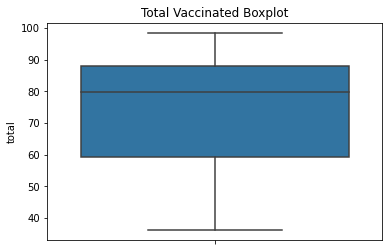

In [30]:
#Using a boxplot to find outliers 
fig, ax = plt.subplots()
sns.boxplot(y = df['total'])
ax.set_title('Total Vaccinated Boxplot')
plt.show()

Phewks! There are no outliers in our data, great Now we can beginning exploring our data to get insights and achieve our objective. 


### 2.3 Exploratory Data Analysis
Here we are going to do three tasks which include;
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

#### Univariate Analysis
The purpose of the univariate analysis is to understand the distribution of values for a single variable.

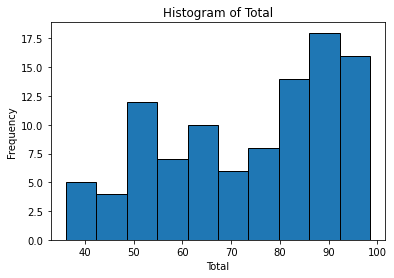

In [38]:
##Visualising the `total` column

n_bins= 10
plt.hist(df['total'], bins=n_bins, edgecolor='black')

plt.title('Histogram of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')

plt.show()

From the histogram above, it means more than 90% vaccines were adminstered

In [48]:
# Analysis of the `vaccine`column
vaccine_proportions = df['vaccine'].value_counts(normalize=True)
print(vaccine_proportions)

Any        0.2
Measles    0.2
Penta 1    0.2
Penta 2    0.2
Penta 3    0.2
Name: vaccine, dtype: float64


This indicates that the distribution of vaccines was evenly spread, and each vaccine type represents approximately 20% of the total

In [50]:
# Analysis of the `state` column
state_proportions = df['state'].value_counts(normalize=True)
print(state_proportions)


Abia                         0.05
Adamawa                      0.05
Kaduna                       0.05
Jigawa                       0.05
Imo                          0.05
Gombe                        0.05
Federal Capital Territory    0.05
Enugu                        0.05
Ekiti                        0.05
Edo                          0.05
Ebonyi                       0.05
Delta                        0.05
Cross River                  0.05
Borno                        0.05
Benue                        0.05
Bayelsa                      0.05
Bauchi                       0.05
Anambra                      0.05
Akwa Ibom                    0.05
Kano                         0.05
Name: state, dtype: float64


All the vaccines were distributed evenly among all the states, fromthe above analysis in proportion. 

#### Bivariate Analysis
Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

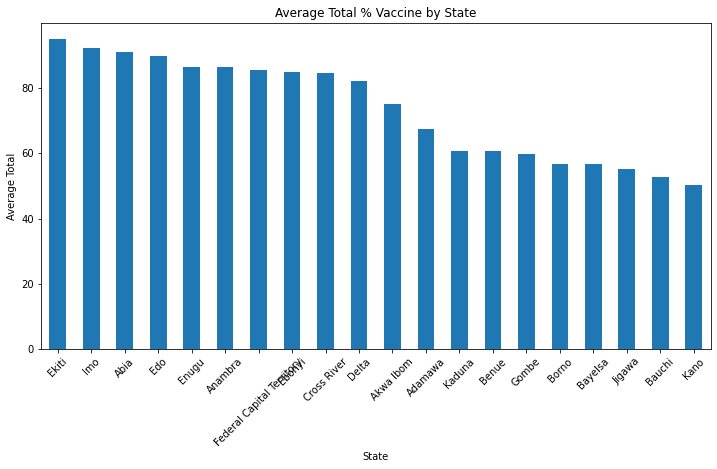

In [70]:
# Group the DataFrame by 'state' and calculate the mean of 'total' for each state
state_totals = df.groupby('state')['total'].mean().sort_values(ascending=False)

# Create a bar plot using the 'state_totals' Series
state_totals.plot(kind='bar', figsize=(12,6))

plt.title('Average Total % Vaccine by State')
plt.xlabel('State')
plt.ylabel('Average Total')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

From the bar plot, we observe that the state that received the highest number of vaccines is 'Ekiti' and the least is 'Kano'

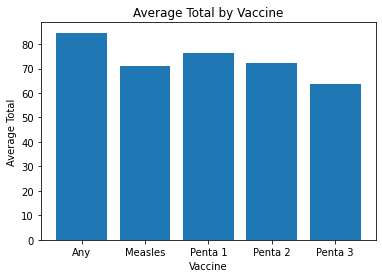

In [58]:
#We are going to do the same with the `vaccine` column and the `total` column

vaccine_totals = df.groupby('vaccine')['total'].mean()

plt.bar(vaccine_totals.index, vaccine_totals.values)
plt.title('Average Total by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Average Total')

plt.show()

The vaccine 'Any' was the most frequent vaccine adminstered to the children in total. 

Let us then go ahead to do a statistical analysis of the highest and lowest vaccination rates per state, we are going to group the dataframe by the 'state' column and the find the maximum and minimum values of the 'total' columns of each unique state

In [72]:
# The highest vaccination rate by finding the maximum value in the total column
# We are going to group them by state and total columns

highest_vaccination_rate = df.groupby('state')['total'].max()
highest_vaccination_rate

state
Abia                         95.5
Adamawa                      83.5
Akwa Ibom                    83.5
Anambra                      96.2
Bauchi                       65.9
Bayelsa                      76.7
Benue                        84.4
Borno                        66.7
Cross River                  89.4
Delta                        93.8
Ebonyi                       94.0
Edo                          95.3
Ekiti                        98.5
Enugu                        94.9
Federal Capital Territory    89.0
Gombe                        69.7
Imo                          96.2
Jigawa                       72.7
Kaduna                       83.6
Kano                         63.3
Name: total, dtype: float64

In [73]:
# The highest vaccination rate by finding the maximum value in the total column
# We are going to group them by state and total columns

lowest_vaccination_rate = df.groupby('state')['total'].min()
print(lowest_vaccination_rate)

state
Abia                         86.4
Adamawa                      51.9
Akwa Ibom                    63.5
Anambra                      77.2
Bauchi                       41.5
Bayelsa                      41.7
Benue                        40.6
Borno                        44.5
Cross River                  75.3
Delta                        73.4
Ebonyi                       74.6
Edo                          81.3
Ekiti                        92.3
Enugu                        79.7
Federal Capital Territory    80.5
Gombe                        49.1
Imo                          86.8
Jigawa                       38.0
Kaduna                       45.9
Kano                         36.1
Name: total, dtype: float64


#### Multivariate Analysis
This is the analysis of more than 2 variables at the same ime and finding out if they are correlated

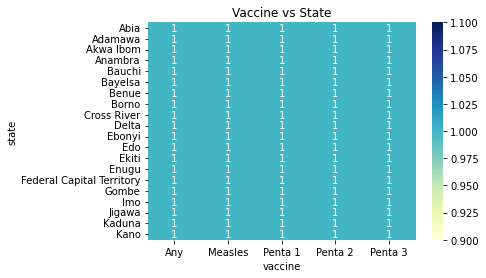

In [69]:
#An analysis of the `vaccine` and `state` columns

sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Vaccine vs State')

plt.show()

Analyzing the cross-tabulation table or heatmap helps us understand the distribution of vaccines across different states and identify any patterns or relationships between the two variables.

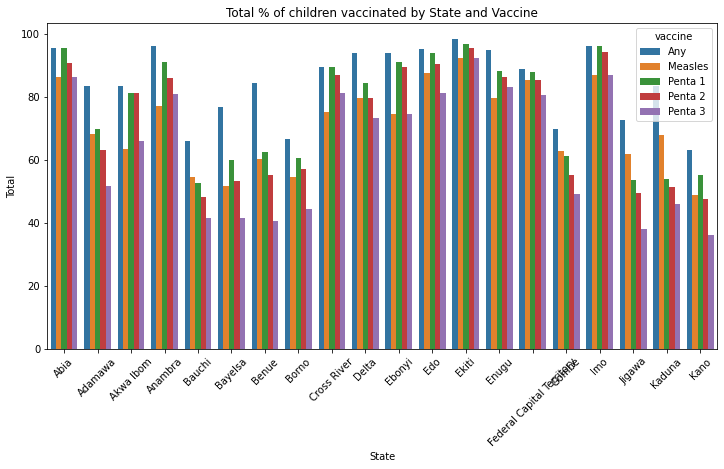

In [68]:
import seaborn as sns

plt.figure(figsize=(12, 6))  # Set the size of the plot

sns.barplot(data=df, x='state', y='total', hue='vaccine')

plt.title('Total % of children vaccinated by State and Vaccine')
plt.xlabel('State')
plt.ylabel('Total')

plt.xticks(rotation=45)

plt.show()
